# Language Identification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**LETHABO, KGATUKE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. From South African Government

. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries for data preparation and model building

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split , cross_validate

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 
from sklearn.datasets import make_regression


import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible

In [3]:
sns.set(style="darkgrid")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:

df_train = pd.read_csv("C:/Users/kgatu/Desktop/Advanced-Regression-Starter-Data-3036/Advanced-Regression-Starter-Data/df_train.csv")
df_test = pd.read_csv("C:/Users/kgatu/Desktop/Advanced-Regression-Starter-Data-3036/Advanced-Regression-Starter-Data/df_test.csv")

#Insurance dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df_train.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

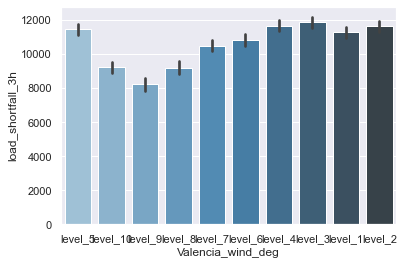

In [6]:
# plot relevant feature interactions
df_train.describe()
sns.barplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_train,
                 palette="Blues_d")

In [7]:
# evaluate correlation
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

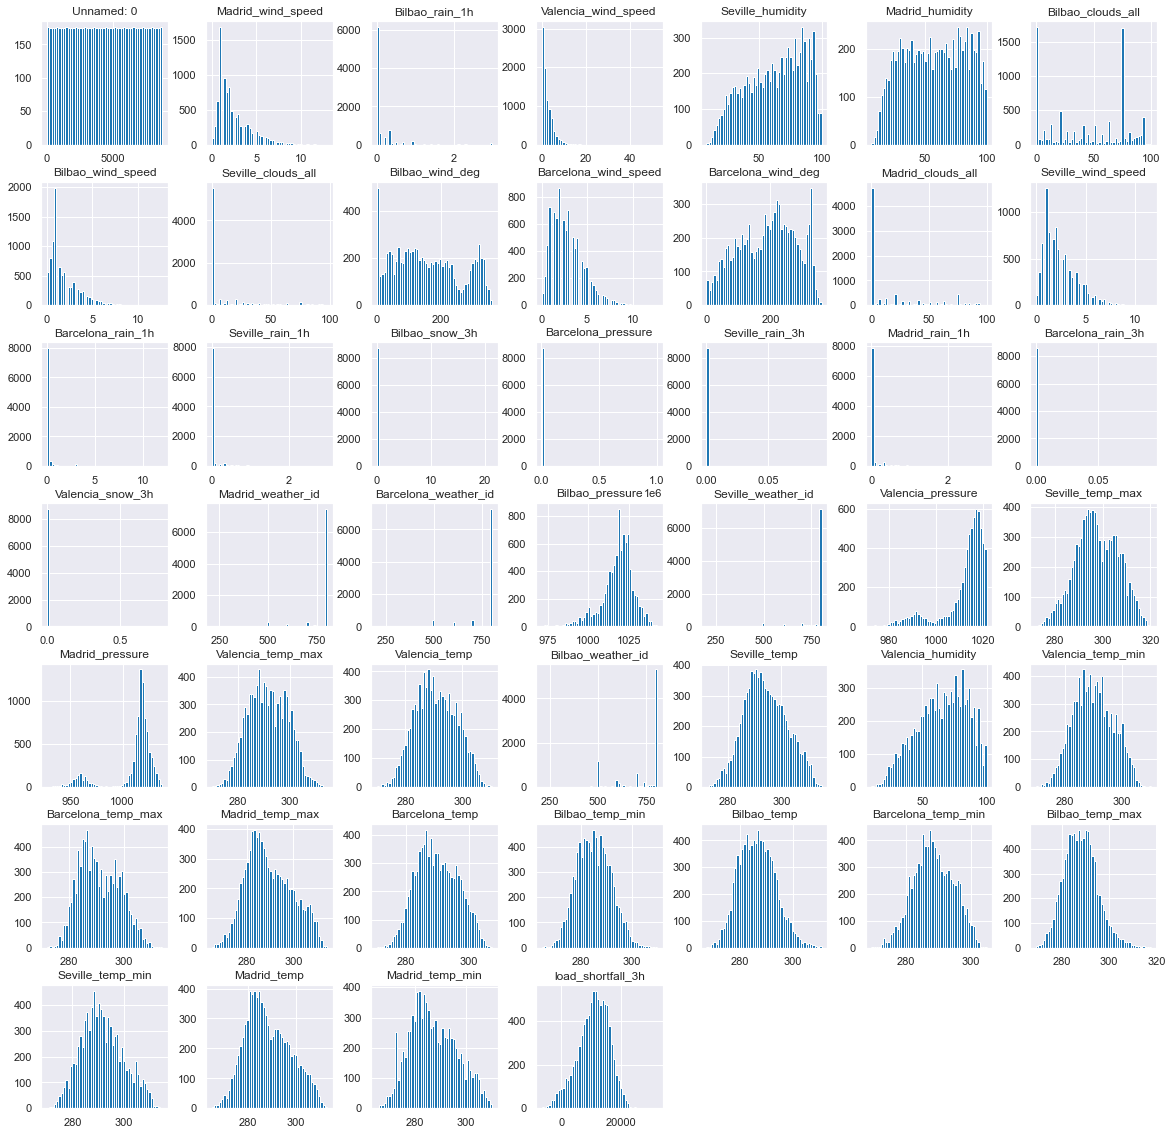

In [8]:
# have a look at feature distributions
df_train.hist(bins=50, figsize=(20,20), color = 'tab:blue')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [9]:
# remove missing values/ features
print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 49)  |  Test data shape: (2920, 48)


In [10]:
# create new features
import datetime as dt

df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])
df_test_copy = df_test.copy()

#day

df_train['Day'] = df_train['time'].dt.day
df_test['Day'] = df_test['time'].dt.day

#month

df_train['Month'] = df_train['time'].dt.month
df_test['Month'] = df_test['time'].dt.month

#year

df_train['Year'] = df_train['time'].dt.year
df_test['Year'] = df_test['time'].dt.year

#hour

df_train['Start_Hour'] = df_train['time'].dt.hour
df_test['Start_Hour'] = df_test['time'].dt.hour

#drop feature

df_train.drop(['time'] , axis=1 , inplace=True)
df_test.drop(['time'] , axis=1 , inplace=True)


In [11]:
columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [19]:
df_test.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_Hour
0,8763,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,1,1,2018,0
1,8764,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,1,1,2018,3
2,8765,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,1,1,2018,6
3,8766,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,1,1,2018,9
4,8767,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,1,1,2018,12


In [20]:
# engineer existing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(df_test.values)

ValueError: could not convert string to float: 'level_5'

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [3]:
# split data


In [4]:
# create targets and features dataset



In [6]:
# create one or more ML models
regression = [
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                        max_depth = 100, alpha = 10, n_estimators = 100),
    
    RandomForestRegressor(max_depth=100)
    
    

SyntaxError: unexpected EOF while parsing (921328945.py, line 8)

In [48]:
# evaluate one or more ML models
from sklearn import metrics
print('-'*40 + 'Trained Succesfully' + '-'*40 + '\n')
for items in regression:
    model = items
    model.fit(X_train[best_features],y_train)
    train_model = model.predict(X_train[best_features])
    test_model = model.predict(X_test[best_features])
    
  
    #Dictionary of results showing RMSE & R2_Score
    results_dict = {'Training':
                        {
                            'Algo': model,
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_train, train_model)),
                            'R2 Score': r2_score(y_train ,train_model)
                            
                        },
                    'Test':
                        {
                            'Algo': '--',
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_test, test_model)),
                            'R2 Score': r2_score(y_test ,test_model)
                        }
                    
                   }
    scores = pd.DataFrame(data=results_dict)
    print(scores)
    print()
    print('-'*50+'End'+'-'*50)
    print()
#     y_pred =  model.predict(X)
#     daf = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
#     output = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})
#     submissionF = output.join(daf)
#     submissionF['load_shortfall_3h'] = daf.values
#     submissionF.to_csv("submissionF.csv", index=False)
#     print(submissionF)


----------------------------------------Trained Succesfully----------------------------------------



AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [30]:
# Compare model performance

In [31]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [32]:
# discuss chosen methods logic